# Code development with flow control: Monthly mean temperature calculation -Part II

In this activity we want to put the attention to the problem of calculating the average.
We have all the 'ingredients' now available to load data from a spreadsheet (comma-separated CSV file format).
**We give you data files with typical problems in the data: 

The daily mean temperatures from Albany airport now have two issues:

- an outlier value (due to some errors in the reporting of the data)
- and missing values are filled with a 'dummy' value -9999 (outside the physical temperature range)

### Your tasks: Find Python code solutions

- remove all fill values ___-9999___ by replacing them with ___np.nan___ in the array
- detect the outlier with help of Boolean expression and filter your data to exclude the outlier. 



In [9]:
%matplotlib inline
# we import our standard suppport packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. Getting the data files


### 1.1 Goto to Github and download the file KALB_daily_tavg_jan2015_flawed.csv

The data files are [located in the folder data on GitHub](https://github.com/oet808/ATMENV315/tree/master/data)




### 1.2 Upload the downloaded data file to your Jupyterlab data folder
Check for the file name extension. It must end with __.csv__.
 

In [2]:
##############################################
# User of the script should make changes here
##############################################
# This notebook is located inside unit3 
# here we use the '../' in the path name to indicate that the data directory is one up in the parent directory.
path="../data/"
filename=path+"KALB_daily_tavg_jan2015_flawed.csv"
print("working with file "+filename)


working with file ../data/KALB_daily_tavg_jan2015_flawed.csv


### 2.2 Load the data and assign them to variables 



In [3]:
import pandas as pd

df=pd.read_csv(filename,names=['day','temperature'])
day=df['day'].values
temp=df['temperature'].values
type(temp)


numpy.ndarray

## 3 Data screening for outliers and fill values 

### 3.1 Plot of the temperature data that you have read from the file


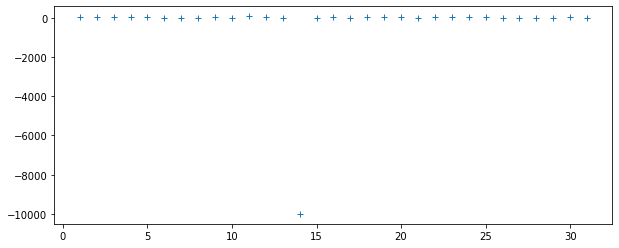

In [4]:
fig,ax=plt.subplots(1,1,figsize=[10,4])
ax.plot(day,temp,'+')
fig.show()


### 3.2 Filter the temperature data / replace fill values with np.nan

- Option a) We drop the outlier value (do not append to the list that we create)
- Option b) We replace the outlier value with a np.nan value

Here we use the first option and fill in  ___np.nan___.

In [5]:
bad=0 # count how many fill value ('bad' data) we have
good=0 # count how many good data we have
threshold=-9999
day_list=[]
temp_list=[]
# begin of loop
i=0 # loop index counter
for value in temp:
    if value > threshold:
        good=good+1 
        print(value)
        temp_list.append( value )
        day_list.append( day[i] )
    else:
        bad=bad+1
        # we choose the option to put np.nan into the list
        temp_list.append( np.nan)
        day_list.append(day[i])
    i=i+1
    # last line of loop code block
# after for-loop
print("number of good data: "+str(good))
print("number of fill values found:"+str(bad))
print("total values processed: "+str(i))

# reassign temp and day
# this allows us to copy the code and make just minor changes 
# for the next filtering task

temp=np.array(temp_list)
day=np.array(day_list)



25
32
27
39
27
13
9
7
20
12
81
32
15
15
21
11
32
34
24
16
25
25
28
25
14
14
13
13
19
7
number of good data: 30
number of fill values found:1
total values processed: 31


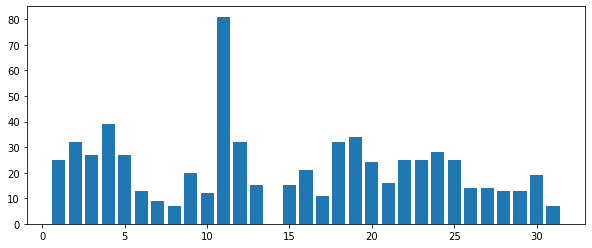

In [6]:
fig,ax=plt.subplots(1,1,figsize=[10,4])
ax.bar(day,temp)
fig.show()


### 3.3 Exclude the outlier temperature value

- Option a) We drop the outlier value (do not append to the list that we create)
- Option b) We replace the outlier value with a np.nan value

Here we use the first option and fill in  ___np.nan___.

In [7]:
bad=0 # count how many temp values exceed 80 F
good=0 # count how many good data we have
threshold=80.0 # F
day_list=[]
temp_list=[]
# begin of loop
i=0 # loop index counter
for value in temp:
    if value < threshold:
        good=good+1 
        print(value)
        day_list.append( day[i] )
        temp_list.append( value )
    else:
        bad=bad+1
        # we choose the option to put np.nan into the list
        temp_list.append( np.nan)
        day_list.append(day[i])
    i=i+1
    # last line of loop code block
# after for-loop
print("number of good data: "+str(good))
print("number of outlier temp values found:"+str(bad))
print("total values processed: "+str(i))
temp=np.array(temp_list)
day=np.array(day_list)

25.0
32.0
27.0
39.0
27.0
13.0
9.0
7.0
20.0
12.0
32.0
15.0
15.0
21.0
11.0
32.0
34.0
24.0
16.0
25.0
25.0
28.0
25.0
14.0
14.0
13.0
13.0
19.0
7.0
number of good data: 29
number of outlier temp values found:2
total values processed: 31


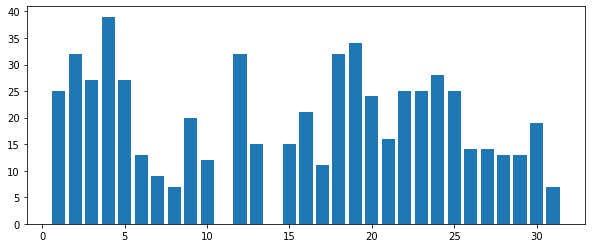

In [8]:
fig,ax=plt.subplots(1,1,figsize=[10,4])
ax.bar(day,temp)
fig.show()

### Tip: 

We now begin to make use of what the developers of the Numpy package can offer us
for writing efficient (and computationally fast) code. We can use the function
___np.mean()___ and ___np.nanmean()___ with an numpy array as an argument to calculate the mean value.
Remember that you can get help on the functions with ___help(np.mean)___ and ___help(np.nanmean)___.


---
## Suggested Reading:
    

- E-book "How to Think Like a Computer Scientist - Learning with Python" (CSPY)
- [CSPY 5 Conditionals ...](https://greenteapress.com/thinkpython2/html/thinkpython2006.html)           
(https://greenteapress.com/thinkpython2/html/thinkpython2011.html)
- Python EU course pages:
   - [conditional statements](https://python-course.eu/python-tutorial/conditional-statements.php)
- PDF document with introduction to Numpy (Blackboard course content)
